In [193]:
import sklearn
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

# 1. Reading games.csv

In [194]:
games = pd.read_csv('./games.csv', ';')
#print(games.head(5))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

/home/diegoflm/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [195]:
# Cuantitative variables (integer)
games.select_dtypes(include=['int64']).describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# 2. Split training data from test data: 80% for training, 20% for testing.

In [196]:
from sklearn.model_selection import train_test_split
N=len(games)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(games, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [197]:
#train_data.shape
#train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40228 entries, 3724 to 26585
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        40228 non-null  int64
 1   firstBlood          40228 non-null  int64
 2   firstTower          40228 non-null  int64
 3   firstInhibitor      40228 non-null  int64
 4   firstBaron          40228 non-null  int64
 5   firstDragon         40228 non-null  int64
 6   firstRiftHerald     40228 non-null  int64
 7   t1_towerKills       40228 non-null  int64
 8   t1_inhibitorKills   40228 non-null  int64
 9   t1_baronKills       40228 non-null  int64
 10  t1_dragonKills      40228 non-null  int64
 11  t1_riftHeraldKills  40228 non-null  int64
 12  t2_towerKills       40228 non-null  int64
 13  t2_inhibitorKills   40228 non-null  int64
 14  t2_baronKills       40228 non-null  int64
 15  t2_dragonKills      40228 non-null  int64
 16  t2_riftHeraldKills  40228 non-null  i

# 3. Pipelines, encoding and scaling.

# Pipeline for categorical attributes

In [198]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [199]:
#6 categorical attributes, where the numeric values don't have a numerical meaning.
cat_atts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

# Pipeline for numeric attributes

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

It was found that the attribute 'gameDuration' is not relevant for the model,  
and leaving it out of the num_atts slightly improves the accuracy. 

In [201]:
#10 numeric attributes
#num_atts = ['gameDuration', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
num_atts =                ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
        't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 
        't2_riftHeraldKills']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())    #Standarization by centering and scaling.
    ])

# Pipeline completo

In [202]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atts),
    ("cat", cat_pipeline, cat_atts), 
])

In [203]:
X_train = full_pipeline.fit_transform(train_data)
X_train.shape

(40228, 27)

In [204]:
X_train[0,:]

array([ 0.84777114,  0.75771706, -0.64857699,  0.48172433, -0.58756965,
       -1.49342369, -0.80028658, -0.68492738, -0.36104192, -0.56938934,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ])

In [205]:
y_train = train_data["winner"]
y_train

3724     1
9457     1
33324    2
1963     2
9983     1
        ..
36158    2
18552    1
22667    1
42535    1
26585    2
Name: winner, Length: 40228, dtype: int64

# 4. Decision Tree
## Decision Tree Classifier

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


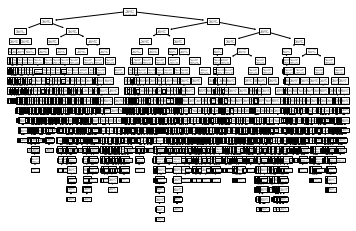

In [206]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 100, 
    splitter = "best", random_state = 123)
tree1.fit(X_train, y_train)
scores1 = cross_val_score(tree1, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores1)
print(scores1.mean())

tree.plot_tree(tree1)
tree.export_graphviz(decision_tree = tree1, class_names = True,out_file = "DTClassifier-max_depth100.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


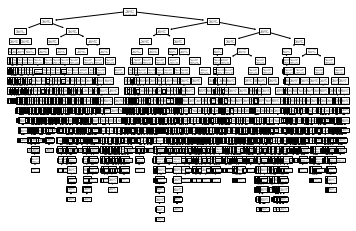

In [207]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree2 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 200, 
    splitter = "best", random_state = 123)
tree2.fit(X_train, y_train)
scores2 = cross_val_score(tree2, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores2)
print(scores2.mean())

tree.plot_tree(tree2)
tree.export_graphviz(decision_tree = tree2, class_names = True,out_file = "DTClassifier-max_depth200.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


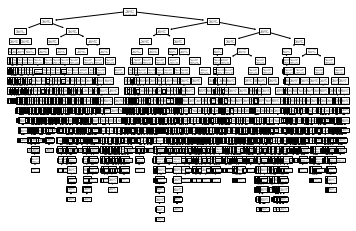

In [208]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree3 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 300, 
    splitter = "best", random_state = 123)
tree3.fit(X_train, y_train)
scores3 = cross_val_score(tree3, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores3)
print(scores3.mean())

tree.plot_tree(tree3)
tree.export_graphviz(decision_tree = tree3, class_names = True,out_file = "DTClassifier-max_depth300.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


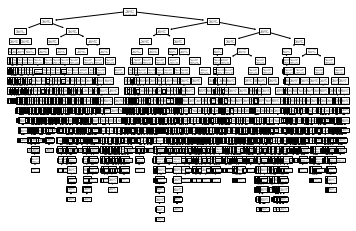

In [209]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree4 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 400, 
    splitter = "best", random_state = 123)
tree4.fit(X_train, y_train)
scores4 = cross_val_score(tree4, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores4)
print(scores4.mean())

tree.plot_tree(tree4)
tree.export_graphviz(decision_tree = tree4, class_names = True,out_file = "DTClassifier-max_depth400.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


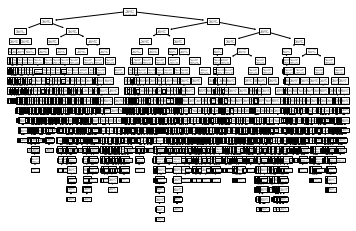

In [210]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree5 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 500, 
    splitter = "best", random_state = 123)
tree5.fit(X_train, y_train)
scores5 = cross_val_score(tree5, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores5)
print(scores5.mean())

tree.plot_tree(tree5)
tree.export_graphviz(decision_tree = tree5, class_names = True,out_file = "DTClassifier-max_depth500.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


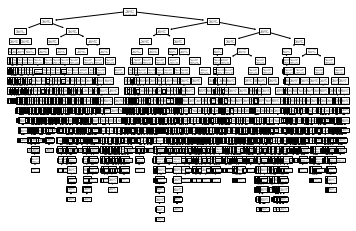

In [211]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree6 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 600, 
    splitter = "best", random_state = 123)
tree6.fit(X_train, y_train)
scores6 = cross_val_score(tree6, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores6)
print(scores6.mean())

tree.plot_tree(tree6)
tree.export_graphviz(decision_tree = tree6, class_names = True,out_file = "DTClassifier-max_depth600.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


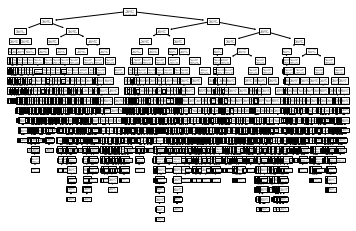

In [212]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree7 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 700, 
    splitter = "best", random_state = 123)
tree7.fit(X_train, y_train)
scores7 = cross_val_score(tree7, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores7)
print(scores7.mean())

tree.plot_tree(tree7)
tree.export_graphviz(decision_tree = tree7, class_names = True,out_file = "DTClassifier-max_depth700.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


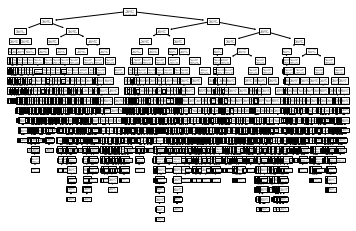

In [213]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree8 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 800, 
    splitter = "best", random_state = 123)
tree8.fit(X_train, y_train)
scores8 = cross_val_score(tree8, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores8)
print(scores8.mean())

tree.plot_tree(tree8)
tree.export_graphviz(decision_tree = tree8, class_names = True,out_file = "DTClassifier-max_depth800.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


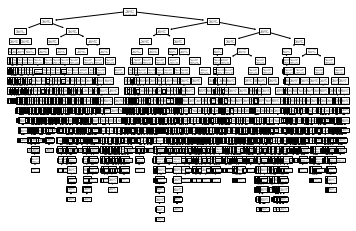

In [214]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree9 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 900, 
    splitter = "best", random_state = 123)
tree9.fit(X_train, y_train)
scores9 = cross_val_score(tree9, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores9)
print(scores9.mean())

tree.plot_tree(tree9)
tree.export_graphviz(decision_tree = tree9, class_names = True,out_file = "DTClassifier-max_depth900.dot")

[0.97066866 0.96992294 0.97216008 0.97265382 0.97315103]
0.9717113051167718


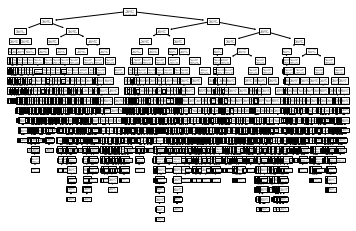

In [215]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree10 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 1000, 
    splitter = "best", random_state = 123)
tree10.fit(X_train, y_train)
scores10 = cross_val_score(tree10, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores10)
print(scores10.mean())

tree.plot_tree(tree10)
tree.export_graphviz(decision_tree = tree10, class_names = True,out_file = "DTClassifier-max_depth1000.dot")

# On the test set:

In [216]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 1.38241931,  1.54651301, -0.64857699, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58044706,  0.75771706,  1.05293306, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48884928, -0.81987484, -0.64857699, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.02349745, -0.81987484, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889,  1.05293306, ...,  1.        ,
         0.        ,  0.        ]])

In [217]:
y_pred1 = tree1.predict(X_test)  
y_pred1

array([1, 1, 2, ..., 2, 1, 1])

In [218]:
y_pred2 = tree2.predict(X_test)  
y_pred2

array([1, 1, 2, ..., 2, 1, 1])

In [219]:
y_pred3 = tree3.predict(X_test)  
y_pred3

array([1, 1, 2, ..., 2, 1, 1])

In [220]:
y_pred4 = tree4.predict(X_test)  
y_pred4

array([1, 1, 2, ..., 2, 1, 1])

In [221]:
y_pred5 = tree5.predict(X_test)  
y_pred5

array([1, 1, 2, ..., 2, 1, 1])

In [222]:
y_pred6 = tree6.predict(X_test)  
y_pred6

array([1, 1, 2, ..., 2, 1, 1])

In [223]:
y_pred7 = tree7.predict(X_test)  
y_pred7

array([1, 1, 2, ..., 2, 1, 1])

In [224]:
y_pred8 = tree8.predict(X_test)  
y_pred8

array([1, 1, 2, ..., 2, 1, 1])

In [225]:
y_pred9 = tree9.predict(X_test)  
y_pred9

array([1, 1, 2, ..., 2, 1, 1])

In [226]:
y_pred10 = tree10.predict(X_test)  
y_pred10

array([1, 1, 2, ..., 2, 1, 1])

In [227]:
y_test = test_data["winner"]

# Results

In [228]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred1
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [229]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred2
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [230]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred3
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [231]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred4
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [232]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred5
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [233]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred6
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [234]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred7
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [235]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred8
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [236]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred9
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [237]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred10
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.029031616623583216


In [238]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9709683833764168

In [239]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9709683833764168

In [240]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.9709683833764168

In [241]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.9709683833764168

In [242]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.9709683833764168

In [243]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6)

0.9709683833764168

In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7)

0.9709683833764168

In [245]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8)

0.9709683833764168

In [246]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9)

0.9709683833764168

In [247]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10)

0.9709683833764168

# 5. Summary (accuracy)

In [248]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree1', accuracy_score(y_test, y_pred1)],
      ['tree2', accuracy_score(y_test, y_pred2)],
      ['tree3', accuracy_score(y_test, y_pred3)],
      ['tree4', accuracy_score(y_test, y_pred4)],
      ['tree5', accuracy_score(y_test, y_pred5)],
      ['tree6', accuracy_score(y_test, y_pred6)],
      ['tree7', accuracy_score(y_test, y_pred7)],
      ['tree8', accuracy_score(y_test, y_pred8)],
      ['tree9', accuracy_score(y_test, y_pred9)],
      ['tree10', accuracy_score(y_test, y_pred10)],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree1  | 0.9709683833764168 |
+--------+--------------------+
| tree2  | 0.9709683833764168 |
+--------+--------------------+
| tree3  | 0.9709683833764168 |
+--------+--------------------+
| tree4  | 0.9709683833764168 |
+--------+--------------------+
| tree5  | 0.9709683833764168 |
+--------+--------------------+
| tree6  | 0.9709683833764168 |
+--------+--------------------+
| tree7  | 0.9709683833764168 |
+--------+--------------------+
| tree8  | 0.9709683833764168 |
+--------+--------------------+
| tree9  | 0.9709683833764168 |
+--------+--------------------+
| tree10 | 0.9709683833764168 |
+--------+--------------------+


Exactly the same accuracy was obtained for all ten values of max_depth

# 6. Now with criterion = entropy, splitter = best.

[0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
0.9713881075673175


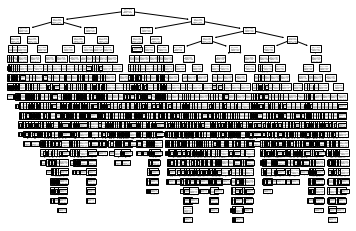

In [249]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 100, 
    splitter = "best", random_state = 123)
tree1.fit(X_train, y_train)
scores1 = cross_val_score(tree1, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores1)
print(scores1.mean())

tree.plot_tree(tree1)
tree.export_graphviz(decision_tree = tree1, class_names = True,out_file = "DTClassifier-6-max_depth100.dot")

scoresArr1[ 0 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 0 ].mean() =  0.9713881075673175
scoresArr1[ 1 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 1 ].mean() =  0.9713881075673175
scoresArr1[ 2 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 2 ].mean() =  0.9713881075673175
scoresArr1[ 3 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 3 ].mean() =  0.9713881075673175
scoresArr1[ 4 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 4 ].mean() =  0.9713881075673175
scoresArr1[ 5 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 5 ].mean() =  0.9713881075673175
scoresArr1[ 6 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 6 ].mean() =  0.9713881075673175
scoresArr1[ 7 ] =  [0.97079294 0.97017151 0.97240865 0.97103791 0.97252952]
scoresArr1[ 7 ].mean() =  0.9713881075673175
scoresArr1[ 8 ] =  [0.97079294 0

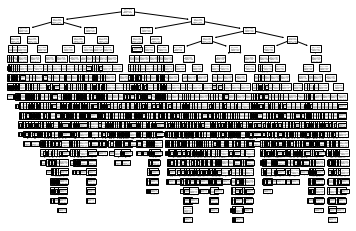

In [250]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr1 = []
scoresArr1 = []
for i in range (10):
    treeArr1.append( tree.DecisionTreeClassifier( criterion = 'entropy', max_depth = 100 * (i + 1),
        splitter = "best", random_state = 123 ) )
    treeArr1[i].fit(X_train, y_train)
    scoresArr1.append( cross_val_score( treeArr1[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr1[", i, "] = ", scoresArr1[i])
    print("scoresArr1[", i, "].mean() = ", scoresArr1[i].mean())
    tree.plot_tree(treeArr1[i])
    tree.export_graphviz(decision_tree = treeArr1[i], class_names = True,
            out_file = "DTClassifier-6-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [251]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 1.38241931,  1.54651301, -0.64857699, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58044706,  0.75771706,  1.05293306, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48884928, -0.81987484, -0.64857699, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.02349745, -0.81987484, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889,  1.05293306, ...,  1.        ,
         0.        ,  0.        ]])

In [252]:
y_predArr1 = []

for i in range(10):
    y_predArr1.append( treeArr1[i].predict( X_test ) )
    print(y_predArr1[i])


#y_pred1 = tree1.predict(X_test)  
#y_pred1

[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]


In [253]:
y_test = test_data["winner"]

# Results

In [254]:
from sklearn.metrics import mean_absolute_error

for i in range(10):
    mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr1[i]
       )
    print(f"Mean Absolute Error for model", i + 1, " = ", mae)

Mean Absolute Error for model 1  =  0.02674487969775303
Mean Absolute Error for model 2  =  0.02674487969775303
Mean Absolute Error for model 3  =  0.02674487969775303
Mean Absolute Error for model 4  =  0.02674487969775303
Mean Absolute Error for model 5  =  0.02674487969775303
Mean Absolute Error for model 6  =  0.02674487969775303
Mean Absolute Error for model 7  =  0.02674487969775303
Mean Absolute Error for model 8  =  0.02674487969775303
Mean Absolute Error for model 9  =  0.02674487969775303
Mean Absolute Error for model 10  =  0.02674487969775303


In [255]:
from sklearn.metrics import accuracy_score
accuracyArr1 = []
for i in range (10):
    accuracyArr1.append( accuracy_score(y_test, y_predArr1[i]) )
    print( "Accuracy of model", i + 1, " = ", accuracyArr1[i] ) 

Accuracy of model 1  =  0.9732551203022469
Accuracy of model 2  =  0.9732551203022469
Accuracy of model 3  =  0.9732551203022469
Accuracy of model 4  =  0.9732551203022469
Accuracy of model 5  =  0.9732551203022469
Accuracy of model 6  =  0.9732551203022469
Accuracy of model 7  =  0.9732551203022469
Accuracy of model 8  =  0.9732551203022469
Accuracy of model 9  =  0.9732551203022469
Accuracy of model 10  =  0.9732551203022469


In [256]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree1', accuracyArr1[0]],
      ['tree2', accuracyArr1[1]],
      ['tree3', accuracyArr1[2]],
      ['tree4', accuracyArr1[3]],
      ['tree5', accuracyArr1[4]],
      ['tree6', accuracyArr1[5]],
      ['tree7', accuracyArr1[6]],
      ['tree8', accuracyArr1[7]],
      ['tree9', accuracyArr1[8]],
      ['tree10', accuracyArr1[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree1  | 0.9732551203022469 |
+--------+--------------------+
| tree2  | 0.9732551203022469 |
+--------+--------------------+
| tree3  | 0.9732551203022469 |
+--------+--------------------+
| tree4  | 0.9732551203022469 |
+--------+--------------------+
| tree5  | 0.9732551203022469 |
+--------+--------------------+
| tree6  | 0.9732551203022469 |
+--------+--------------------+
| tree7  | 0.9732551203022469 |
+--------+--------------------+
| tree8  | 0.9732551203022469 |
+--------+--------------------+
| tree9  | 0.9732551203022469 |
+--------+--------------------+
| tree10 | 0.9732551203022469 |
+--------+--------------------+


# Comparison
The accuracies are exactly the same for both configurations of parameters.

# 7. Now with criterion = entropy, splitter = random.

scoresArr2[ 0 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 0 ].mean() =  0.971238996033837
scoresArr2[ 1 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 1 ].mean() =  0.971238996033837
scoresArr2[ 2 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 2 ].mean() =  0.971238996033837
scoresArr2[ 3 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 3 ].mean() =  0.971238996033837
scoresArr2[ 4 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 4 ].mean() =  0.971238996033837
scoresArr2[ 5 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 5 ].mean() =  0.971238996033837
scoresArr2[ 6 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 6 ].mean() =  0.971238996033837
scoresArr2[ 7 ] =  [0.96992294 0.97054437 0.97091723 0.9696706  0.97513984]
scoresArr2[ 7 ].mean() =  0.971238996033837
scoresArr2[ 8 ] =  [0.96992294 0.9705443

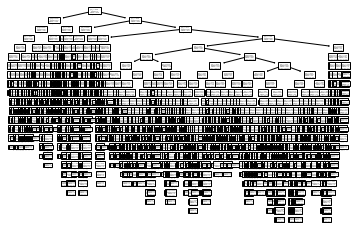

In [257]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr2 = []
scoresArr2 = []
for i in range (10):
    treeArr2.append( tree.DecisionTreeClassifier( criterion = 'entropy', max_depth = 100 * (i + 1),
        splitter = "random", random_state = 123 ) )
    treeArr2[i].fit(X_train, y_train)
    scoresArr2.append( cross_val_score( treeArr2[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr2[", i, "] = ", scoresArr2[i])
    print("scoresArr2[", i, "].mean() = ", scoresArr2[i].mean())
    tree.plot_tree(treeArr2[i])
    tree.export_graphviz(decision_tree = treeArr2[i], class_names = True,
            out_file = "DTClassifier-7-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [258]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 1.38241931,  1.54651301, -0.64857699, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58044706,  0.75771706,  1.05293306, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48884928, -0.81987484, -0.64857699, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.02349745, -0.81987484, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889,  1.05293306, ...,  1.        ,
         0.        ,  0.        ]])

In [259]:
y_predArr2 = []

for i in range(10):
    y_predArr2.append( treeArr2[i].predict( X_test ) )
    print(y_predArr2[i])

#y_pred1 = tree1.predict(X_test)  
#y_pred1

[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]


In [260]:
y_test = test_data["winner"]

In [261]:
from sklearn.metrics import mean_absolute_error

for i in range(10):
    mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr2[i]
       )
    print(f"Mean Absolute Error for model", i + 1, " = ", mae)

Mean Absolute Error for model 1  =  0.02873334658977928
Mean Absolute Error for model 2  =  0.02873334658977928
Mean Absolute Error for model 3  =  0.02873334658977928
Mean Absolute Error for model 4  =  0.02873334658977928
Mean Absolute Error for model 5  =  0.02873334658977928
Mean Absolute Error for model 6  =  0.02873334658977928
Mean Absolute Error for model 7  =  0.02873334658977928
Mean Absolute Error for model 8  =  0.02873334658977928
Mean Absolute Error for model 9  =  0.02873334658977928
Mean Absolute Error for model 10  =  0.02873334658977928


In [262]:
from sklearn.metrics import accuracy_score
accuracyArr2 = []
for i in range (10):
    accuracyArr2.append( accuracy_score(y_test, y_predArr2[i]) )
    print( "Accuracy of model", i + 1, " = ", accuracyArr2[i] ) 

Accuracy of model 1  =  0.9712666534102207
Accuracy of model 2  =  0.9712666534102207
Accuracy of model 3  =  0.9712666534102207
Accuracy of model 4  =  0.9712666534102207
Accuracy of model 5  =  0.9712666534102207
Accuracy of model 6  =  0.9712666534102207
Accuracy of model 7  =  0.9712666534102207
Accuracy of model 8  =  0.9712666534102207
Accuracy of model 9  =  0.9712666534102207
Accuracy of model 10  =  0.9712666534102207


In [280]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree21', accuracyArr2[0]],
      ['tree22', accuracyArr2[1]],
      ['tree23', accuracyArr2[2]],
      ['tree24', accuracyArr2[3]],
      ['tree25', accuracyArr2[4]],
      ['tree26', accuracyArr2[5]],
      ['tree27', accuracyArr2[6]],
      ['tree28', accuracyArr2[7]],
      ['tree29', accuracyArr2[8]],
      ['tree30', accuracyArr2[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree21 | 0.9712666534102207 |
+--------+--------------------+
| tree22 | 0.9712666534102207 |
+--------+--------------------+
| tree23 | 0.9712666534102207 |
+--------+--------------------+
| tree24 | 0.9712666534102207 |
+--------+--------------------+
| tree25 | 0.9712666534102207 |
+--------+--------------------+
| tree26 | 0.9712666534102207 |
+--------+--------------------+
| tree27 | 0.9712666534102207 |
+--------+--------------------+
| tree28 | 0.9712666534102207 |
+--------+--------------------+
| tree29 | 0.9712666534102207 |
+--------+--------------------+
| tree30 | 0.9712666534102207 |
+--------+--------------------+


# Comparison
The accuracies are very similar, the the last is higher.

# 8. Hyper-parameters that lead to the best accuracy so far:

criterion = gini, splitter = best, random_state = 123.  
A change in max_depth, as long as its value is greater than 100, doesn't change the accuracy.

# 9. Chosen hyper-parameter: min_samples_leaf: int or float, default = 1
"The minimum number of samples required to be at a leaf node." 

# min_samples_leaf = 3 :

scoresArr3[ 0 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 0 ].mean() =  0.9742218879108272
scoresArr3[ 1 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 1 ].mean() =  0.9742218879108272
scoresArr3[ 2 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 2 ].mean() =  0.9742218879108272
scoresArr3[ 3 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 3 ].mean() =  0.9742218879108272
scoresArr3[ 4 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 4 ].mean() =  0.9742218879108272
scoresArr3[ 5 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 5 ].mean() =  0.9742218879108272
scoresArr3[ 6 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 6 ].mean() =  0.9742218879108272
scoresArr3[ 7 ] =  [0.97253294 0.9745215  0.97750435 0.97240522 0.97414543]
scoresArr3[ 7 ].mean() =  0.9742218879108272
scoresArr3[ 8 ] =  [0.97253294 0

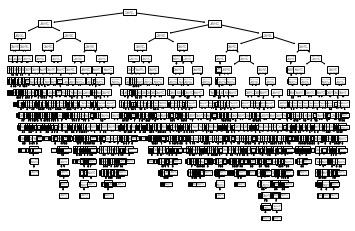

In [264]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr3 = []
scoresArr3 = []
for i in range (10):
    treeArr3.append( tree.DecisionTreeClassifier( criterion = 'gini', max_depth = 100 * (i + 1),
        splitter = "best", random_state = 123, min_samples_leaf = 3 ) )
    treeArr3[i].fit(X_train, y_train)
    scoresArr3.append( cross_val_score( treeArr3[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr3[", i, "] = ", scoresArr3[i])
    print("scoresArr3[", i, "].mean() = ", scoresArr3[i].mean())
    tree.plot_tree(treeArr3[i])
    tree.export_graphviz(decision_tree = treeArr3[i], class_names = True,
            out_file = "DTClassifier-9a-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [266]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 1.38241931,  1.54651301, -0.64857699, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58044706,  0.75771706,  1.05293306, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48884928, -0.81987484, -0.64857699, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.02349745, -0.81987484, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889,  1.05293306, ...,  1.        ,
         0.        ,  0.        ]])

In [267]:
y_predArr3 = []

for i in range(10):
    y_predArr3.append( treeArr3[i].predict( X_test ) )
    print(y_predArr3[i])

#y_pred1 = tree1.predict(X_test)  
#y_pred1

[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]


In [268]:
y_test = test_data["winner"]

In [269]:
from sklearn.metrics import mean_absolute_error

for i in range(10):
    mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr3[i]
       )
    print(f"Mean Absolute Error for model", i + 31, " = ", mae)

Mean Absolute Error for model 31  =  0.024656989461125472
Mean Absolute Error for model 32  =  0.024656989461125472
Mean Absolute Error for model 33  =  0.024656989461125472
Mean Absolute Error for model 34  =  0.024656989461125472
Mean Absolute Error for model 35  =  0.024656989461125472
Mean Absolute Error for model 36  =  0.024656989461125472
Mean Absolute Error for model 37  =  0.024656989461125472
Mean Absolute Error for model 38  =  0.024656989461125472
Mean Absolute Error for model 39  =  0.024656989461125472
Mean Absolute Error for model 40  =  0.024656989461125472


In [270]:
from sklearn.metrics import accuracy_score
accuracyArr3 = []
for i in range (10):
    accuracyArr3.append( accuracy_score(y_test, y_predArr3[i]) )
    print( "Accuracy of model", i + 31, " = ", accuracyArr3[i] ) 

Accuracy of model 31  =  0.9753430105388745
Accuracy of model 32  =  0.9753430105388745
Accuracy of model 33  =  0.9753430105388745
Accuracy of model 34  =  0.9753430105388745
Accuracy of model 35  =  0.9753430105388745
Accuracy of model 36  =  0.9753430105388745
Accuracy of model 37  =  0.9753430105388745
Accuracy of model 38  =  0.9753430105388745
Accuracy of model 39  =  0.9753430105388745
Accuracy of model 40  =  0.9753430105388745


In [279]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree31', accuracyArr3[0]],
      ['tree32', accuracyArr3[1]],
      ['tree33', accuracyArr3[2]],
      ['tree34', accuracyArr3[3]],
      ['tree35', accuracyArr3[4]],
      ['tree36', accuracyArr3[5]],
      ['tree37', accuracyArr3[6]],
      ['tree38', accuracyArr3[7]],
      ['tree39', accuracyArr3[8]],
      ['tree40', accuracyArr3[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree31 | 0.9753430105388745 |
+--------+--------------------+
| tree32 | 0.9753430105388745 |
+--------+--------------------+
| tree33 | 0.9753430105388745 |
+--------+--------------------+
| tree34 | 0.9753430105388745 |
+--------+--------------------+
| tree35 | 0.9753430105388745 |
+--------+--------------------+
| tree36 | 0.9753430105388745 |
+--------+--------------------+
| tree37 | 0.9753430105388745 |
+--------+--------------------+
| tree38 | 0.9753430105388745 |
+--------+--------------------+
| tree39 | 0.9753430105388745 |
+--------+--------------------+
| tree40 | 0.9753430105388745 |
+--------+--------------------+


# min_samples_leaf = 5 :

scoresArr4[ 0 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 0 ].mean() =  0.9759619910808068
scoresArr4[ 1 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 1 ].mean() =  0.9759619910808068
scoresArr4[ 2 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 2 ].mean() =  0.9759619910808068
scoresArr4[ 3 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 3 ].mean() =  0.9759619910808068
scoresArr4[ 4 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 4 ].mean() =  0.9759619910808068
scoresArr4[ 5 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 5 ].mean() =  0.9759619910808068
scoresArr4[ 6 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 6 ].mean() =  0.9759619910808068
scoresArr4[ 7 ] =  [0.97501864 0.97750435 0.97638578 0.97464264 0.97625855]
scoresArr4[ 7 ].mean() =  0.9759619910808068
scoresArr4[ 8 ] =  [0.97501864 0

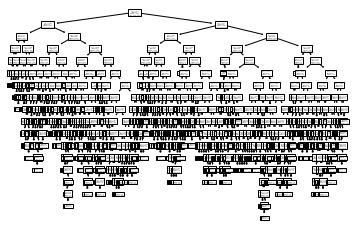

In [272]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr4 = []
scoresArr4 = []
for i in range (10):
    treeArr4.append( tree.DecisionTreeClassifier( criterion = 'gini', max_depth = 100 * (i + 1),
        splitter = "best", random_state = 123, min_samples_leaf = 5 ) )
    treeArr4[i].fit(X_train, y_train)
    scoresArr4.append( cross_val_score( treeArr4[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr4[", i, "] = ", scoresArr4[i])
    print("scoresArr4[", i, "].mean() = ", scoresArr4[i].mean())
    tree.plot_tree(treeArr4[i])
    tree.export_graphviz(decision_tree = treeArr4[i], class_names = True,
            out_file = "DTClassifier-9b-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [273]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 1.38241931,  1.54651301, -0.64857699, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58044706,  0.75771706,  1.05293306, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48884928, -0.81987484, -0.64857699, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.02349745, -0.81987484, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889, -0.64857699, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58044706, -0.03107889,  1.05293306, ...,  1.        ,
         0.        ,  0.        ]])

In [274]:
y_predArr4 = []

for i in range(10):
    y_predArr4.append( treeArr4[i].predict( X_test ) )
    print(y_predArr4[i])

#y_pred1 = tree1.predict(X_test)  
#y_pred1

[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]
[1 1 2 ... 2 1 1]


In [275]:
y_test = test_data["winner"]

In [276]:
from sklearn.metrics import mean_absolute_error

for i in range(10):
    mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr4[i]
       )
    print(f"Mean Absolute Error for model", i + 41, " = ", mae)

Mean Absolute Error for model 41  =  0.025154106184132035
Mean Absolute Error for model 42  =  0.025154106184132035
Mean Absolute Error for model 43  =  0.025154106184132035
Mean Absolute Error for model 44  =  0.025154106184132035
Mean Absolute Error for model 45  =  0.025154106184132035
Mean Absolute Error for model 46  =  0.025154106184132035
Mean Absolute Error for model 47  =  0.025154106184132035
Mean Absolute Error for model 48  =  0.025154106184132035
Mean Absolute Error for model 49  =  0.025154106184132035
Mean Absolute Error for model 50  =  0.025154106184132035


In [277]:
from sklearn.metrics import accuracy_score
accuracyArr4 = []
for i in range (10):
    accuracyArr4.append( accuracy_score(y_test, y_predArr4[i]) )
    print( "Accuracy of model", i + 41, " = ", accuracyArr4[i] ) 

Accuracy of model 41  =  0.974845893815868
Accuracy of model 42  =  0.974845893815868
Accuracy of model 43  =  0.974845893815868
Accuracy of model 44  =  0.974845893815868
Accuracy of model 45  =  0.974845893815868
Accuracy of model 46  =  0.974845893815868
Accuracy of model 47  =  0.974845893815868
Accuracy of model 48  =  0.974845893815868
Accuracy of model 49  =  0.974845893815868
Accuracy of model 50  =  0.974845893815868


In [278]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree41', accuracyArr4[0]],
      ['tree42', accuracyArr4[1]],
      ['tree43', accuracyArr4[2]],
      ['tree44', accuracyArr4[3]],
      ['tree45', accuracyArr4[4]],
      ['tree46', accuracyArr4[5]],
      ['tree47', accuracyArr4[6]],
      ['tree48', accuracyArr4[7]],
      ['tree49', accuracyArr4[8]],
      ['tree50', accuracyArr4[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+-------------------+
| Tree   | Accuracy          |
+--------+-------------------+
| tree41 | 0.974845893815868 |
+--------+-------------------+
| tree42 | 0.974845893815868 |
+--------+-------------------+
| tree43 | 0.974845893815868 |
+--------+-------------------+
| tree44 | 0.974845893815868 |
+--------+-------------------+
| tree45 | 0.974845893815868 |
+--------+-------------------+
| tree46 | 0.974845893815868 |
+--------+-------------------+
| tree47 | 0.974845893815868 |
+--------+-------------------+
| tree48 | 0.974845893815868 |
+--------+-------------------+
| tree49 | 0.974845893815868 |
+--------+-------------------+
| tree50 | 0.974845893815868 |
+--------+-------------------+


# Comparison
By varying the min_samples_leaf hyper-parameter, the accuracy was improved for both  
min_samples_leaf = 3, and  min_samples_leaf = 5.  
The best result was obtained with a value of 3 for the attribute.  
Both new values improved the best result previously obtained.  
This increment in the value of min_samples_leaf can prevent overfitting.